## EDA + Cleaning Step-by-Step Checklist
STEP 1 — Reload data

### You reload the dataset from data/raw/diabetes.csv.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/working.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df = pd.read_csv('/content/drive/MyDrive/working.csv')
display(df.head())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### What we have to do now means observation look at the dataset carefully and remove inconsistency, typos according to the standard.

In [3]:
print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


### 1. change the columns name to lower case for better readability and make easy to understand for model.


In [4]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [5]:
display(df.head())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ## Initial Data Inspection
Checklist:

###
.head() to preview first rows

###
.shape to confirm rows & columns

###
.info() for datatypes & missing value summary

###
.describe() for statistical summary

Check for:

###
wrong datatypes

inconsistent values

impossible values

unusual patterns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Observation

- All the columns are in proper dtypes format no need to change.
- All the columns are in lower case as per the standard.

In [7]:
print(df.shape)

(768, 9)


Obervation :

- So we have 768 rows and 9 columns for user undersatnding we are explaining each cell for better understanding.

In [8]:
display(df.describe())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observation:

- While looking the count rows we dont have any missing values simple as that.
- According to the healthcare domain knowledge we have some outliers we will see this practically.
- our target column which is outcome has imbalanced we need to balanced it.

In [9]:
df.to_csv('working.csv', index=False)

5. Replace Biological Zero Values

Important for Pima Diabetes Dataset
These columns cannot have zero values:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Tasks:

Count zero values

Replace with median of non-zero values

Document replacements

In [10]:
columns_to_flag = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']

for col in columns_to_flag:
    df[f'flag_{col}'] = (df[col] == 0).astype(int)

display(df.head())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,flag_glucose,flag_bloodpressure,flag_skinthickness,flag_insulin,flag_bmi
0,6,148,72,35,0,33.6,0.627,50,1,0,0,0,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0,0,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,0,0,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,0,0,0


### Explanation of New Flag Columns

We have added new flag columns to the DataFrame, such as `flag_glucose`, `flag_bloodpressure`, etc.

*   A value of `1` in these flag columns indicates that the corresponding original column (e.g., `glucose`) has a value of `0` in that particular row.
*   A value of `0` means the original column has a non-zero value.

These flag columns serve as clear indicators for a clinic assistant or anyone reviewing the data to immediately see where biologically implausible zero values exist. This allows for quick identification of rows that might require further investigation, data imputation, or careful consideration during clinical assessment or research analysis. For example, if `flag_bloodpressure` is `1`, it means the blood pressure for that patient was recorded as `0`, which is biologically impossible and signifies missing data.

In [11]:
df.to_csv('flag_diabetes.csv', index=False)
print("DataFrame saved to 'flag_diabetes.csv'")

DataFrame saved to 'flag_diabetes.csv'


The DataFrame, now including the flag columns for biological zeros, has been successfully saved to `flag_diabetes.csv`. This file can now be easily shared or used for further analysis with these important data quality indicators included.

In [12]:
# Columns identified with biological zero values that should be treated as missing
columns_to_impute = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']

# Replace 0 values with NaN in the specified columns
for col in columns_to_impute:
    df[col] = df[col].replace(0, pd.NA)

print("Zeros replaced with NaN:")
display(df[columns_to_impute].head())

Zeros replaced with NaN:


,glucose,bloodpressure,skinthickness,insulin,bmi
0,148,72,35,<NA>,33.6
1,85,66,29,<NA>,26.6
2,183,64,<NA>,<NA>,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


### Imputing Missing Values with the Median

Now that the biological zeros are marked as `NaN`, we will impute these missing values using the median of each respective column. The median is chosen because it is robust to outliers, which is particularly relevant for columns like `insulin`.

In [13]:
# Impute NaN values with the median of each column
for col in columns_to_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("NaN values imputed with median:")
display(df[columns_to_impute].head())
display(df.head())

NaN values imputed with median:


/tmp/ipython-input-4244845314.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(median_val)
/tmp/ipython-input-4244845314.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(median_val)
/tmp/ipython-input-4244845314.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fi

,glucose,bloodpressure,skinthickness,insulin,bmi
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,flag_glucose,flag_bloodpressure,flag_skinthickness,flag_insulin,flag_bmi
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,0,0,1,0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,0,0,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,0,1,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0


### Verification of Imputation

To ensure all biological zeros have been handled, we can check the minimum value for the imputed columns. These should now be non-zero (or at least greater than zero if the median was imputed).

In [14]:
print(df[columns_to_impute].min())

glucose          44.0
bloodpressure    24.0
skinthickness     7.0
insulin          14.0
bmi              18.2
dtype: float64


6. Outlier Detection

Boxplots for each numeric column

Identify extreme values

Use IQR method to detect outliers

Document findings

```
`# This is formatted as code`
```



In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'outcome' in numeric_cols:
    numeric_cols.remove('outcome')

# Filter out 'flag_' columns
numeric_cols = [col for col in numeric_cols if not col.startswith('flag_')]

print("Numeric columns for outlier detection (excluding flag columns):")
print(numeric_cols)

Numeric columns for outlier detection (excluding flag columns):
['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']


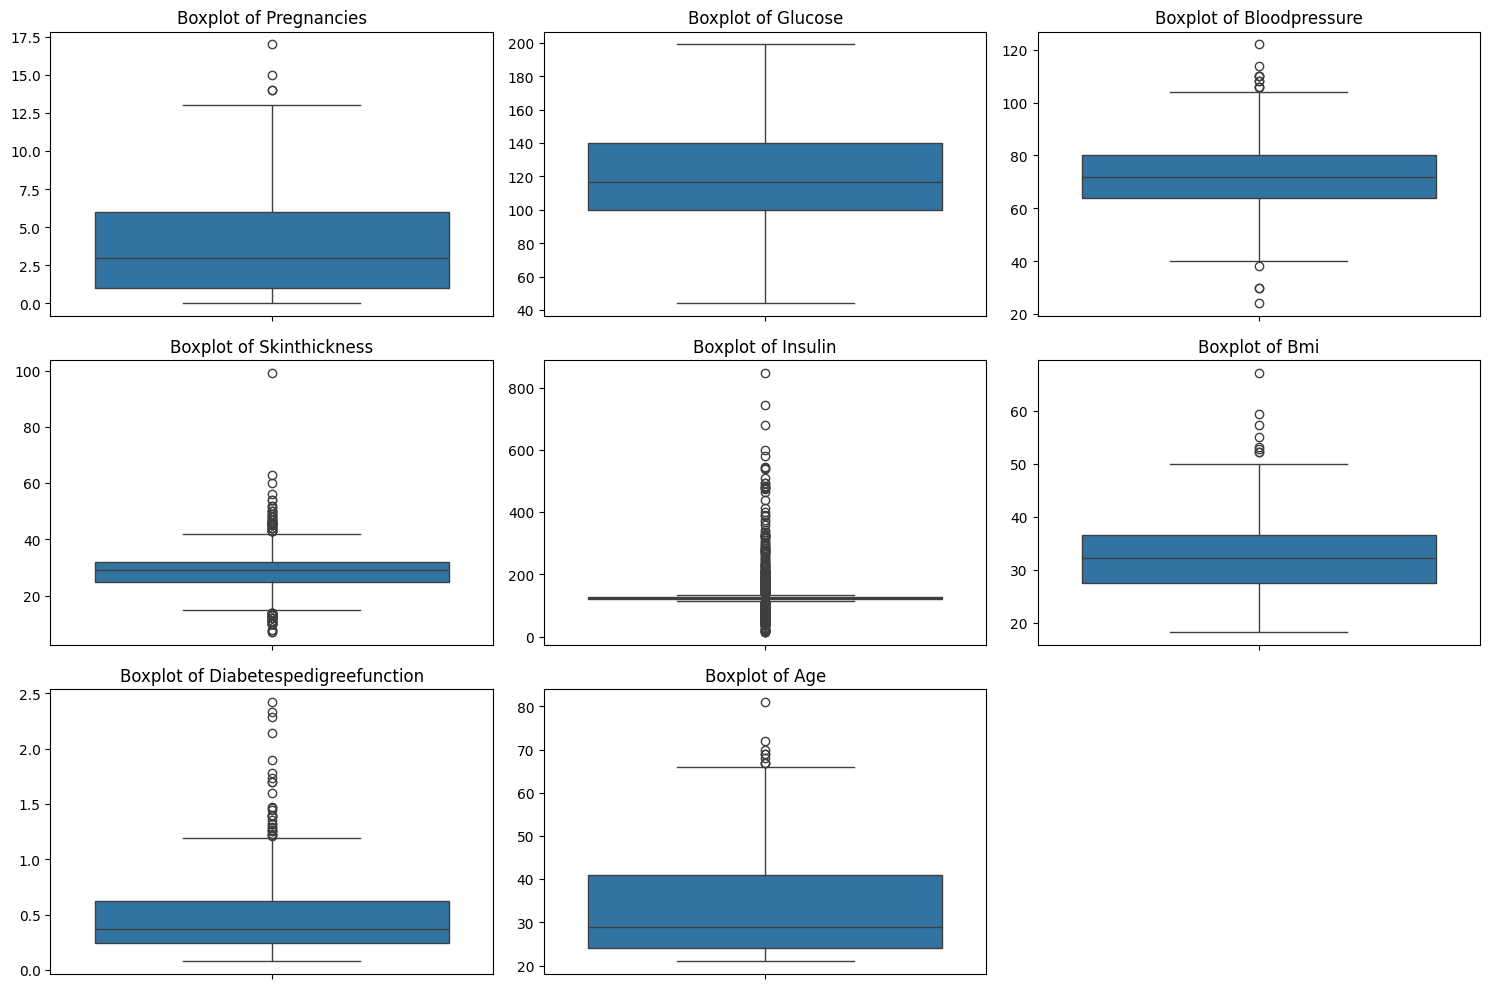

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure size
plt.figure(figsize=(15, 10))

# Determine the number of rows and columns for the subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3 # Roughly 3 columns per row

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.capitalize()}')
    plt.ylabel('') # Remove y-label for cleaner look, title is sufficient

plt.tight_layout()
plt.show()

In [17]:
outlier_results = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    outlier_results[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': num_outliers,
        'percentage_outliers': percentage_outliers
    }

print("Outlier detection results using IQR method (excluding flag columns):")
for col, data in outlier_results.items():
    print(f"Column: {col}")
    print(f"  Q1: {data['Q1']:.2f}, Q3: {data['Q3']:.2f}, IQR: {data['IQR']:.2f}")
    print(f"  Lower Bound: {data['lower_bound']:.2f}, Upper Bound: {data['upper_bound']:.2f}")
    print(f"  Number of Outliers: {data['num_outliers']} ({data['percentage_outliers']:.2f}%)")
    print("\n")

Outlier detection results using IQR method (excluding flag columns):
Column: pregnancies
  Q1: 1.00, Q3: 6.00, IQR: 5.00
  Lower Bound: -6.50, Upper Bound: 13.50
  Number of Outliers: 4 (0.52%)


Column: glucose
  Q1: 99.75, Q3: 140.25, IQR: 40.50
  Lower Bound: 39.00, Upper Bound: 201.00
  Number of Outliers: 0 (0.00%)


Column: bloodpressure
  Q1: 64.00, Q3: 80.00, IQR: 16.00
  Lower Bound: 40.00, Upper Bound: 104.00
  Number of Outliers: 14 (1.82%)


Column: skinthickness
  Q1: 25.00, Q3: 32.00, IQR: 7.00
  Lower Bound: 14.50, Upper Bound: 42.50
  Number of Outliers: 87 (11.33%)


Column: insulin
  Q1: 121.50, Q3: 127.25, IQR: 5.75
  Lower Bound: 112.88, Upper Bound: 135.88
  Number of Outliers: 346 (45.05%)


Column: bmi
  Q1: 27.50, Q3: 36.60, IQR: 9.10
  Lower Bound: 13.85, Upper Bound: 50.25
  Number of Outliers: 8 (1.04%)


Column: diabetespedigreefunction
  Q1: 0.24, Q3: 0.63, IQR: 0.38
  Lower Bound: -0.33, Upper Bound: 1.20
  Number of Outliers: 29 (3.78%)


Column: age
  Q1

## Outlier Detection Summary (Excluding Flag Columns)



### Quantitative Summary from IQR Method:

*   **`pregnancies`**: 4 outliers (0.52%)
*   **`glucose`**: 0 outliers (0.00%)
*   **`bloodpressure`**: 14 outliers (1.82%)
*   **`skinthickness`**: 87 outliers (11.33%)
*   **`insulin`**: 346 outliers (45.05%)
*   **`bmi`**: 8 outliers (1.04%)
*   **`diabetespedigreefunction`**: 29 outliers (3.78%)
*   **`age`**: 9 outliers (1.17%)

**Overall Observation**: The `insulin` and `skinthickness` columns continue to show the highest number and percentage of outliers, suggesting these features might require more robust handling (e.g., capping, transformation, or specific imputation strategies) in subsequent steps. These findings will guide further data preprocessing steps.

## 7. Outlier Treatment

Apply the chosen treatment:

capping (winsorization)

or transformation

or removing only if necessary

Document number of rows affected

Re-check distributions

## Outlier Treatment Methods

Outliers are data points that significantly deviate from other observations. They can skew statistical analyses and model training. The choice of treatment depends heavily on the nature of the data, the domain knowledge, and the extent of outliers.

### Common Outlier Treatment Methods:

1.  **Capping (Winsorization)**:
    *   **Description**: This method involves setting a threshold for outlier values, replacing all data points beyond that threshold with the threshold value itself. For example, values above the upper bound might be replaced with the upper bound, and values below the lower bound might be replaced with the lower bound.
    *   **Suitability**: It is often preferred when outliers are genuine observations but are extreme, and you want to reduce their influence without removing data. It's particularly useful when the data distribution is skewed or when a high percentage of outliers would lead to significant data loss if removed. It preserves sample size.

2.  **Transformation**:
    *   **Description**: Applying mathematical functions (e.g., logarithmic, square root, reciprocal) to the data to reduce the impact of extreme values and make the data more normally distributed.
    *   **Suitability**: Useful when the distribution is highly skewed and normalizing the data is beneficial for modeling. It helps in stabilizing variance and making the data conform to assumptions of certain statistical models.

3.  **Removal (Trimming/Filtering)**:
    *   **Description**: Directly deleting the rows or observations that contain outlier values.
    *   **Suitability**: This method is suitable when outliers are clearly data entry errors or anomalies that cannot be explained by natural variation. It is generally advised to use this method cautiously, especially if the sample size is small or the percentage of outliers is high, as it leads to loss of information.

### Decision Criteria for `insulin` and `skinthickness`:

Given the previous outlier detection results, both `insulin` (45.05% outliers) and `skinthickness` (11.33% outliers) show a high percentage of values identified as outliers by the IQR method. Removing these observations would lead to a substantial loss of data, which is generally undesirable.

Therefore, **capping (winsorization)** is a suitable primary method for these columns. It allows us to:

*   **Retain data**: Minimize data loss by not removing entire rows.
*   **Reduce influence**: Limit the extreme impact of outliers on statistical measures and model training.
*   **Maintain structure**: Preserve the overall structure and relationships within the dataset, as opposed to transformations which can alter interpretations.

For `insulin` specifically, its highly skewed distribution and large number of outliers make capping a pragmatic choice to manage its extreme values without discarding nearly half of the dataset. For `skinthickness`, while the percentage is lower, capping still offers a good balance between managing extreme values and data retention.

## Choose and Apply Outlier Treatment

### Subtask:
Select an appropriate outlier treatment method (e.g., capping using IQR bounds) for columns with a high percentage of outliers, such as 'insulin' and 'skinthickness', and apply it to the DataFrame.


**Reasoning**:
I will define the columns to be capped, then iterate through them to apply capping using the previously calculated IQR bounds, and finally display the head of the DataFrame to show the changes.



In [18]:
columns_to_cap = ['insulin', 'skinthickness']

for col in columns_to_cap:
    lower_bound = outlier_results[col]['lower_bound']
    upper_bound = outlier_results[col]['upper_bound']

    # Apply capping
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("DataFrame after capping outliers in insulin and skinthickness:")
display(df.head())

DataFrame after capping outliers in insulin and skinthickness:


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,flag_glucose,flag_bloodpressure,flag_skinthickness,flag_insulin,flag_bmi
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,0,0,0,1,0
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,0,0,0,1,0
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,0,0,1,1,0
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,0,0,0,0,0
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33,1,0,0,0,0,0


## Document Treatment Impact

### Subtask:
Record the number of values that were adjusted or capped in each treated column to understand the extent of the changes made to the dataset.


**Reasoning**:
To document the impact of the capping treatment, I will iterate through the capped columns, retrieve their original IQR bounds, and count how many values in the current DataFrame now equal these bounds, indicating how many outliers were adjusted.



In [19]:
print("\n--- Outlier Treatment Impact ---")
for col in columns_to_cap:
    lower_bound = outlier_results[col]['lower_bound']
    upper_bound = outlier_results[col]['upper_bound']

    # Count values capped at the lower bound
    num_capped_lower = (df[col] == lower_bound).sum()

    # Count values capped at the upper bound
    num_capped_upper = (df[col] == upper_bound).sum()

    total_capped = num_capped_lower + num_capped_upper

    print(f"Column '{col}':")
    print(f"  Values capped at lower bound ({lower_bound:.2f}): {num_capped_lower}")
    print(f"  Values capped at upper bound ({upper_bound:.2f}): {num_capped_upper}")
    print(f"  Total values adjusted/capped: {total_capped}\n")


--- Outlier Treatment Impact ---
Column 'insulin':
  Values capped at lower bound (112.88): 173
  Values capped at upper bound (135.88): 173
  Total values adjusted/capped: 346

Column 'skinthickness':
  Values capped at lower bound (14.50): 39
  Values capped at upper bound (42.50): 48
  Total values adjusted/capped: 87



## Re-check Distributions Visually

### Subtask:
Generate new boxplots for the treated numeric columns to visually inspect the updated distributions and confirm the effectiveness of the outlier treatment.


**Reasoning**:
To visually inspect the updated distributions after outlier treatment, I will generate new boxplots for all numeric columns, similar to the initial outlier detection step.



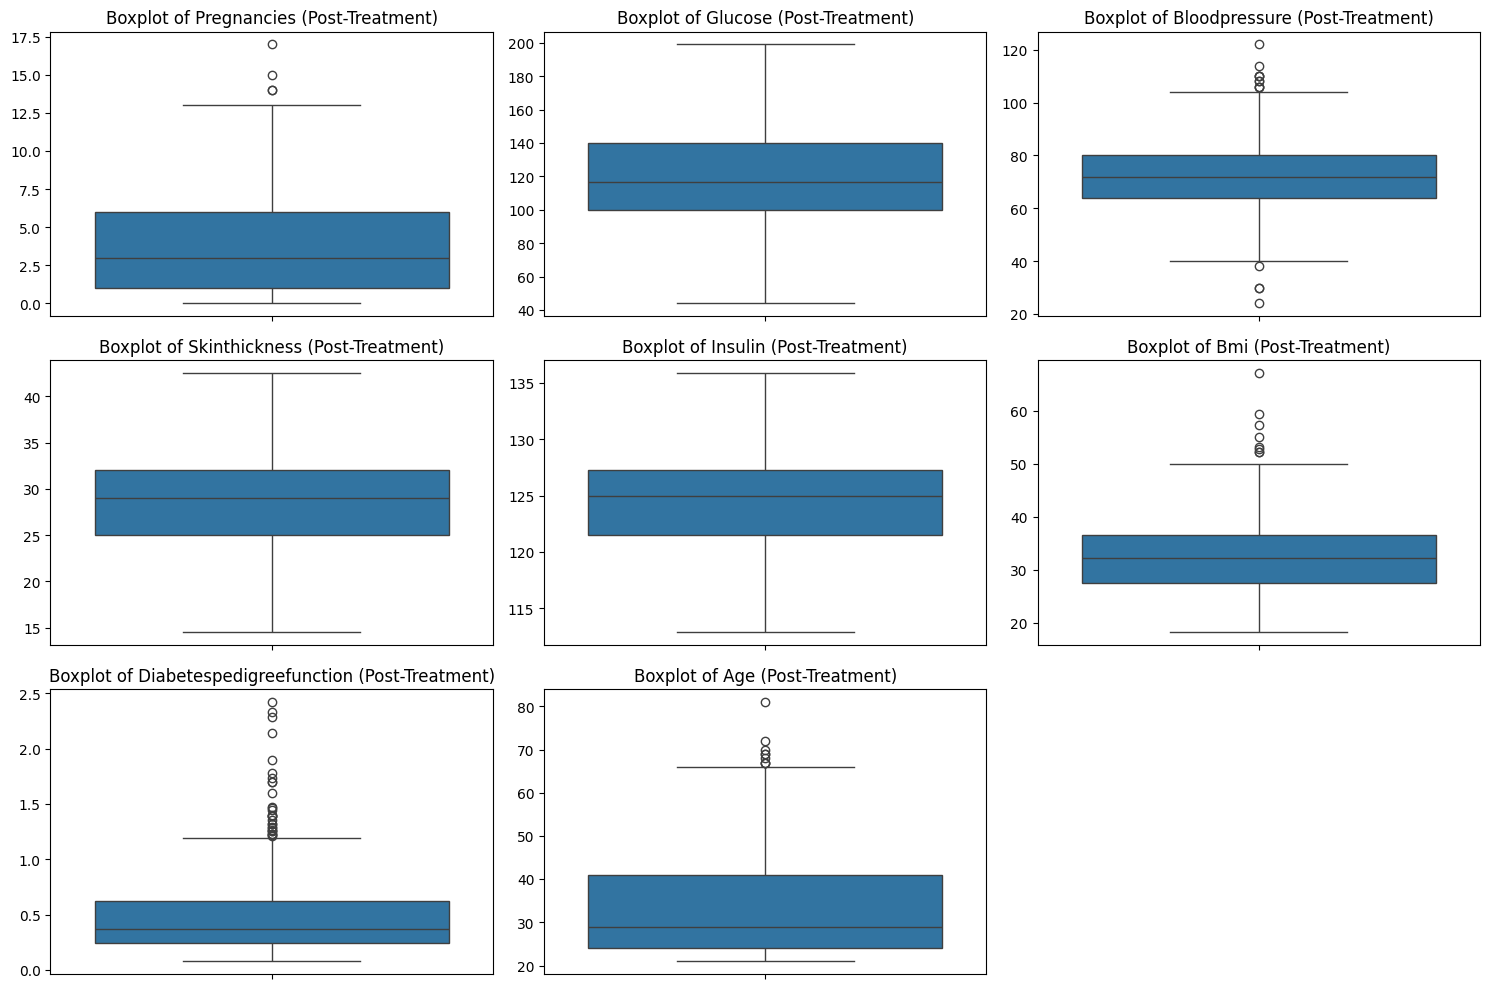

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure size
plt.figure(figsize=(15, 10))

# Determine the number of rows and columns for the subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3 # Roughly 3 columns per row

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.capitalize()} (Post-Treatment)')
    plt.ylabel('') # Remove y-label for cleaner look, title is sufficient

plt.tight_layout()
plt.show()

## Re-check Outlier Counts Quantitatively

### Subtask:
Re-run the IQR-based outlier detection for the treated numeric columns to quantitatively verify the reduction in the number and percentage of outliers.


**Reasoning**:
To quantitatively verify the impact of outlier treatment, I will re-run the IQR-based outlier detection for all numeric columns and store the results in a new dictionary.



In [21]:
new_outlier_results = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    new_outlier_results[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': num_outliers,
        'percentage_outliers': percentage_outliers
    }

print("\nOutlier detection results using IQR method (Post-Treatment):\n")
for col, data in new_outlier_results.items():
    print(f"Column: {col}")
    print(f"  Q1: {data['Q1']:.2f}, Q3: {data['Q3']:.2f}, IQR: {data['IQR']:.2f}")
    print(f"  Lower Bound: {data['lower_bound']:.2f}, Upper Bound: {data['upper_bound']:.2f}")
    print(f"  Number of Outliers: {data['num_outliers']} ({data['percentage_outliers']:.2f}%)\n")


Outlier detection results using IQR method (Post-Treatment):

Column: pregnancies
  Q1: 1.00, Q3: 6.00, IQR: 5.00
  Lower Bound: -6.50, Upper Bound: 13.50
  Number of Outliers: 4 (0.52%)

Column: glucose
  Q1: 99.75, Q3: 140.25, IQR: 40.50
  Lower Bound: 39.00, Upper Bound: 201.00
  Number of Outliers: 0 (0.00%)

Column: bloodpressure
  Q1: 64.00, Q3: 80.00, IQR: 16.00
  Lower Bound: 40.00, Upper Bound: 104.00
  Number of Outliers: 14 (1.82%)

Column: skinthickness
  Q1: 25.00, Q3: 32.00, IQR: 7.00
  Lower Bound: 14.50, Upper Bound: 42.50
  Number of Outliers: 0 (0.00%)

Column: insulin
  Q1: 121.50, Q3: 127.25, IQR: 5.75
  Lower Bound: 112.88, Upper Bound: 135.88
  Number of Outliers: 0 (0.00%)

Column: bmi
  Q1: 27.50, Q3: 36.60, IQR: 9.10
  Lower Bound: 13.85, Upper Bound: 50.25
  Number of Outliers: 8 (1.04%)

Column: diabetespedigreefunction
  Q1: 0.24, Q3: 0.63, IQR: 0.38
  Lower Bound: -0.33, Upper Bound: 1.20
  Number of Outliers: 29 (3.78%)

Column: age
  Q1: 24.00, Q3: 41.00

8. Feature Distribution Analysis

For each column:

Histogram

KDE

Skewness

Kurtosis

Comments (normal, skewed, bimodal, etc.)

# Task
Analyze the distribution of each numeric feature in the DataFrame by:
1.  Generating a combined histogram and Kernel Density Estimate (KDE) plot for each numeric column to visually represent its distribution.
2.  Calculating the skewness and kurtosis coefficients for each numeric column.
3.  Providing a descriptive classification of each numeric column's distribution (e.g., normal, skewed, bimodal, uniform) based on the plots and calculated metrics.
4.  Presenting a comprehensive summary of the feature distribution analysis, highlighting key findings regarding the shape and characteristics of each feature's distribution.

## Generate Histograms and KDE Plots

### Subtask:
For each numeric column, generate a combined histogram and Kernel Density Estimate (KDE) plot to visually represent its distribution. Ensure plots are clearly labeled and interpretable.


**Reasoning**:
To visually represent the distribution of each numeric column, I will generate combined histograms and KDE plots using `seaborn.histplot` within subplots, ensuring clear labels and an appropriate figure size.



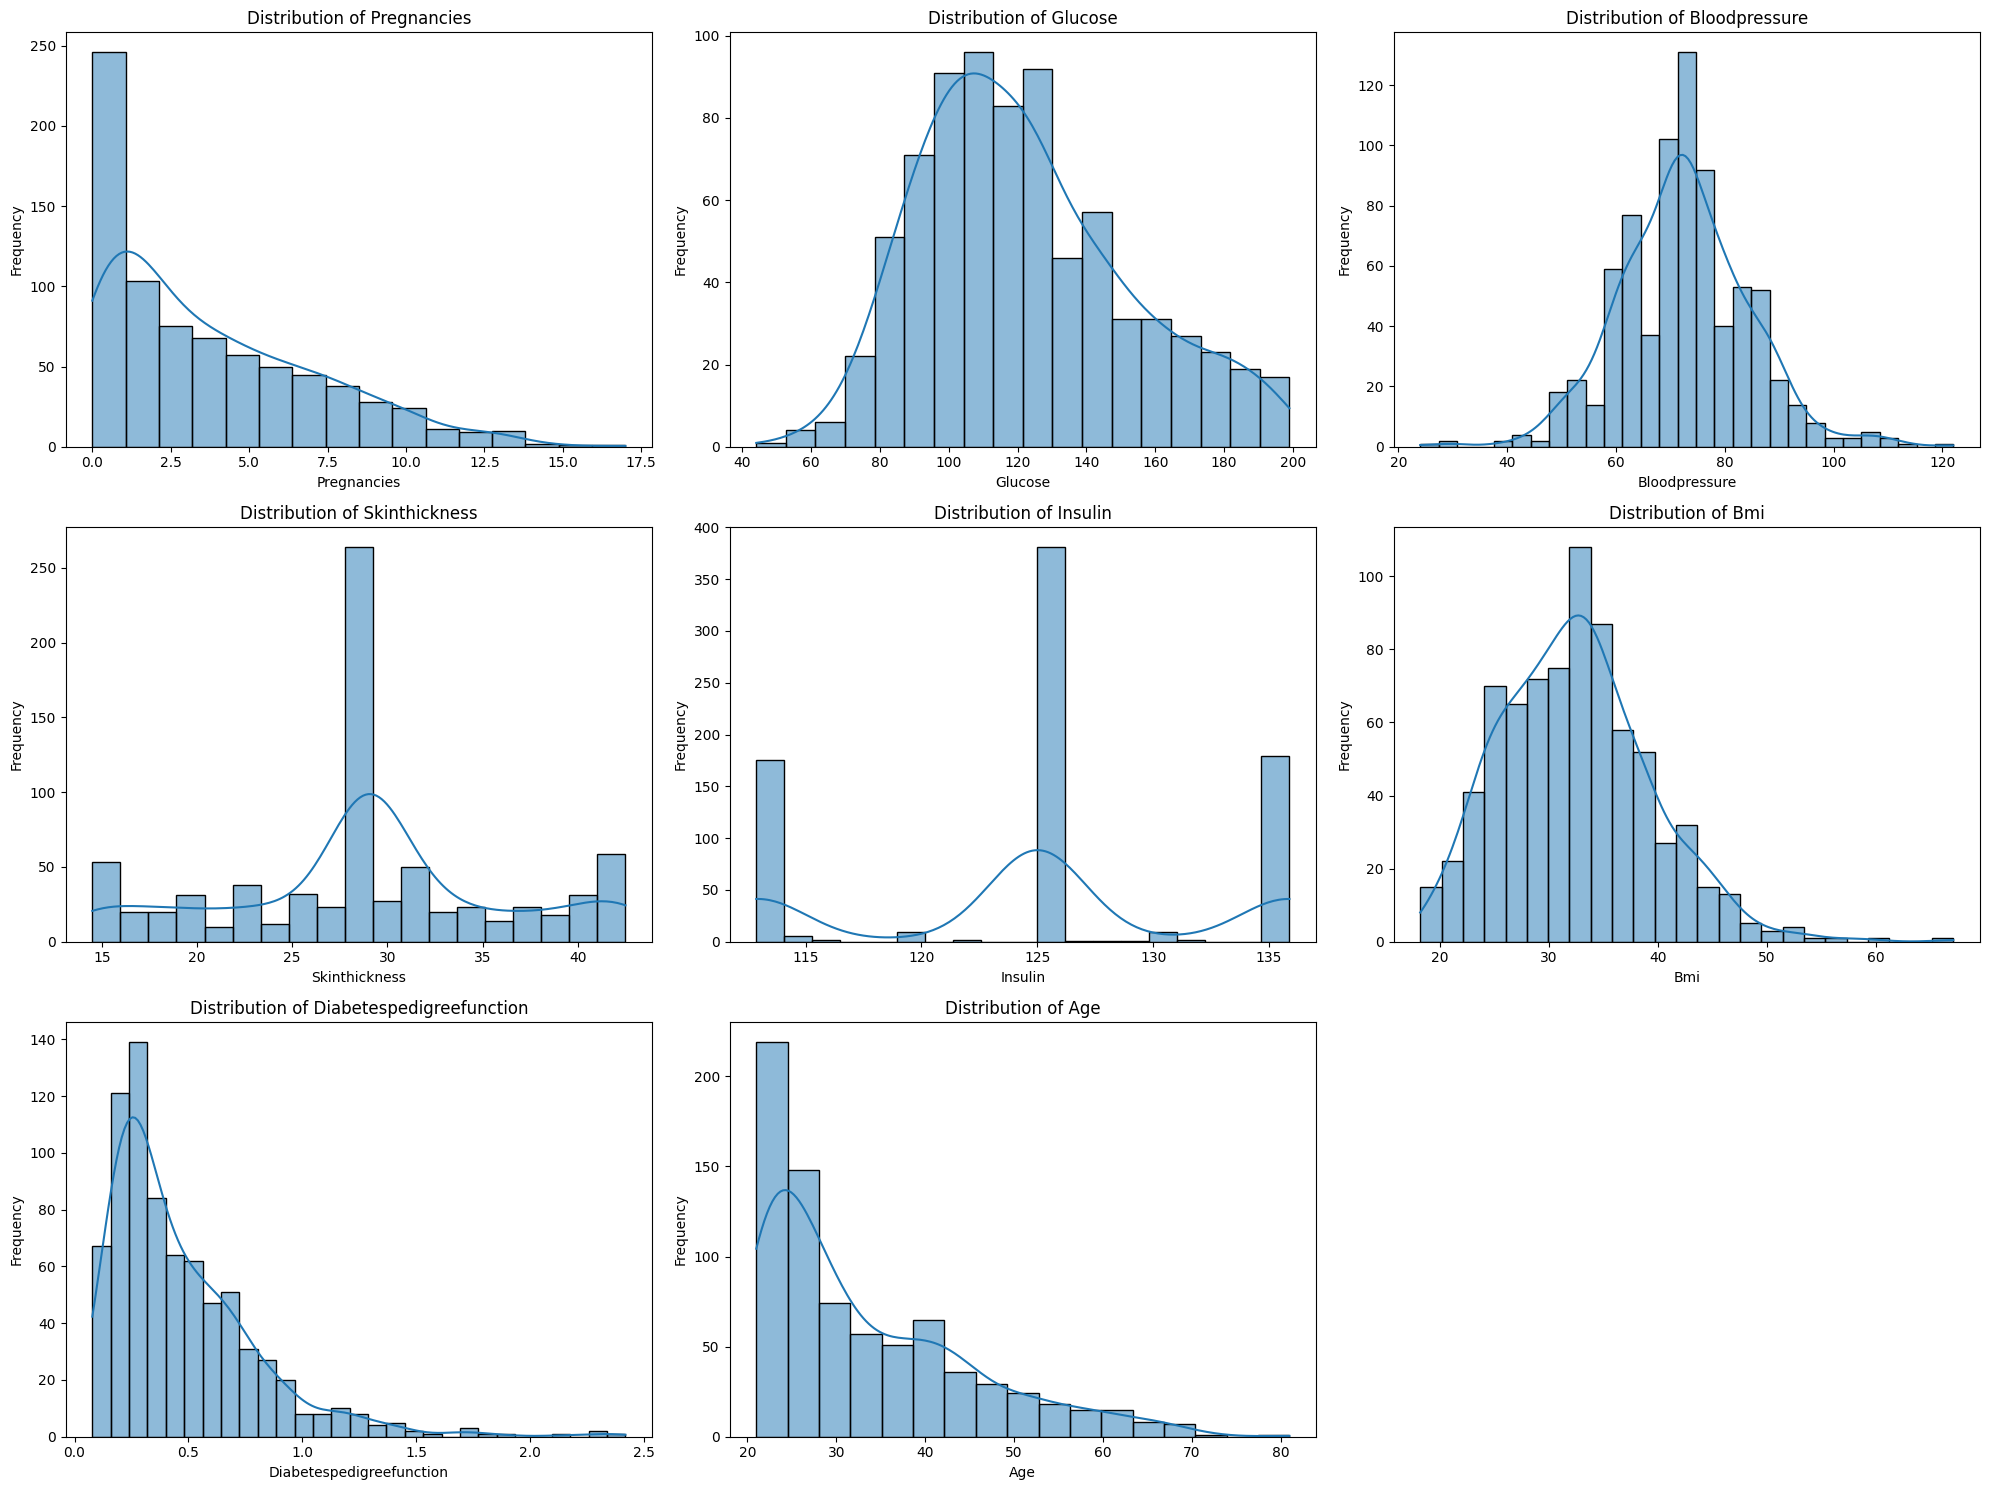

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure size to accommodate multiple plots
plt.figure(figsize=(20, 15)) # Increased size for better visibility

# Determine the number of rows and columns for the subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3 # Roughly 3 columns per row

# Create histograms with KDE for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df[col], kde=True) # Generate histogram with KDE
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Calculate Skewness and Kurtosis

### Subtask:
For each numeric column, calculate its skewness and kurtosis coefficients to quantitatively assess the shape and tailedness of its distribution.


**Reasoning**:
To quantitatively assess the shape and tailedness of each numeric column's distribution, I will calculate and print its skewness and kurtosis coefficients.



In [23]:
import pandas as pd

# Calculate skewness and kurtosis for numeric columns
skewness_results = df[numeric_cols].skew()
kurtosis_results = df[numeric_cols].kurtosis()

print("--- Skewness Results ---")
print(skewness_results)
print(
)
print("--- Kurtosis Results ---")
print(kurtosis_results)

--- Skewness Results ---
pregnancies                 0.901674
glucose                     0.535587
bloodpressure               0.141885
skinthickness              -0.057643
insulin                    -0.118221
bmi                         0.599233
diabetespedigreefunction    1.919911
age                         1.129597
dtype: float64

--- Kurtosis Results ---
pregnancies                 0.159220
glucose                    -0.257847
bloodpressure               1.098239
skinthickness              -0.356318
insulin                    -0.915841
bmi                         0.920222
diabetespedigreefunction    5.594954
age                         0.643159
dtype: float64


9. Skewness Correction (If Required)

Identify highly skewed features

Apply log / sqrt / box-cox / yeo-johnson

Show before–after comparison

Document impact

## Identify Highly Skewed Features

### Subtask:
Based on the previously calculated skewness results, identify features that are considered highly skewed and would benefit from transformation. We will typically look for features with an absolute skewness value greater than a certain threshold (e.g., 0.5 or 1.0).


**Reasoning**:
To identify highly skewed features, I will define a skewness threshold, filter the previously calculated skewness results based on this threshold, and then print the names of the columns that exceed this threshold.



In [24]:
skewness_threshold = 0.5
highly_skewed_features = skewness_results[abs(skewness_results) > skewness_threshold].index.tolist()

print(f"Features with absolute skewness greater than {skewness_threshold}:")
print(highly_skewed_features)

Features with absolute skewness greater than 0.5:
['pregnancies', 'glucose', 'bmi', 'diabetespedigreefunction', 'age']


**Reasoning**:
Now that highly skewed features have been identified, the next step is to apply the Yeo-Johnson transformation to these features. I will create new columns in the DataFrame to store the transformed data, explicitly naming them to indicate transformation, which will allow for easy comparison and documentation of changes.



In [25]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer with Yeo-Johnson method
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Create a copy of the DataFrame to store transformed features
df_transformed = df.copy()

# Apply Yeo-Johnson transformation to highly skewed features
print("Applying Yeo-Johnson transformation to the following features:")
for feature in highly_skewed_features:
    # Reshape the column to a 2D array as required by PowerTransformer
    df_transformed[f'{feature}_yeojohnson'] = yeo_johnson_transformer.fit_transform(df_transformed[[feature]])
    print(f"- {feature}")

print("\nFirst 5 rows of DataFrame with transformed features:")
display(df_transformed[highly_skewed_features + [f'{f}_yeojohnson' for f in highly_skewed_features]].head())

Applying Yeo-Johnson transformation to the following features:
- pregnancies
- glucose
- bmi
- diabetespedigreefunction
- age

First 5 rows of DataFrame with transformed features:


,pregnancies,glucose,bmi,diabetespedigreefunction,age,pregnancies_yeojohnson,glucose_yeojohnson,bmi_yeojohnson,diabetespedigreefunction_yeojohnson,age_yeojohnson
0,6,148.0,33.6,0.627,50,0.813399,0.907992,0.260613,0.821764,1.364180
1,1,85.0,26.6,0.351,31,-0.833906,-1.305305,-0.842925,-0.168409,0.126452
2,8,183.0,23.3,0.672,32,1.188996,1.785503,-1.457644,0.935284,0.230161
3,1,89.0,28.1,0.167,21,-0.833906,-1.126118,-0.585976,-1.298725,-1.480075
4,0,137.0,43.1,2.288,33,-1.603317,0.592903,1.462860,2.336680,0.327328


**Reasoning**:
To visually compare the distributions before and after transformation, I will generate side-by-side histogram and KDE plots for each highly skewed feature and its Yeo-Johnson transformed counterpart. This will help in understanding the effectiveness of the transformation.



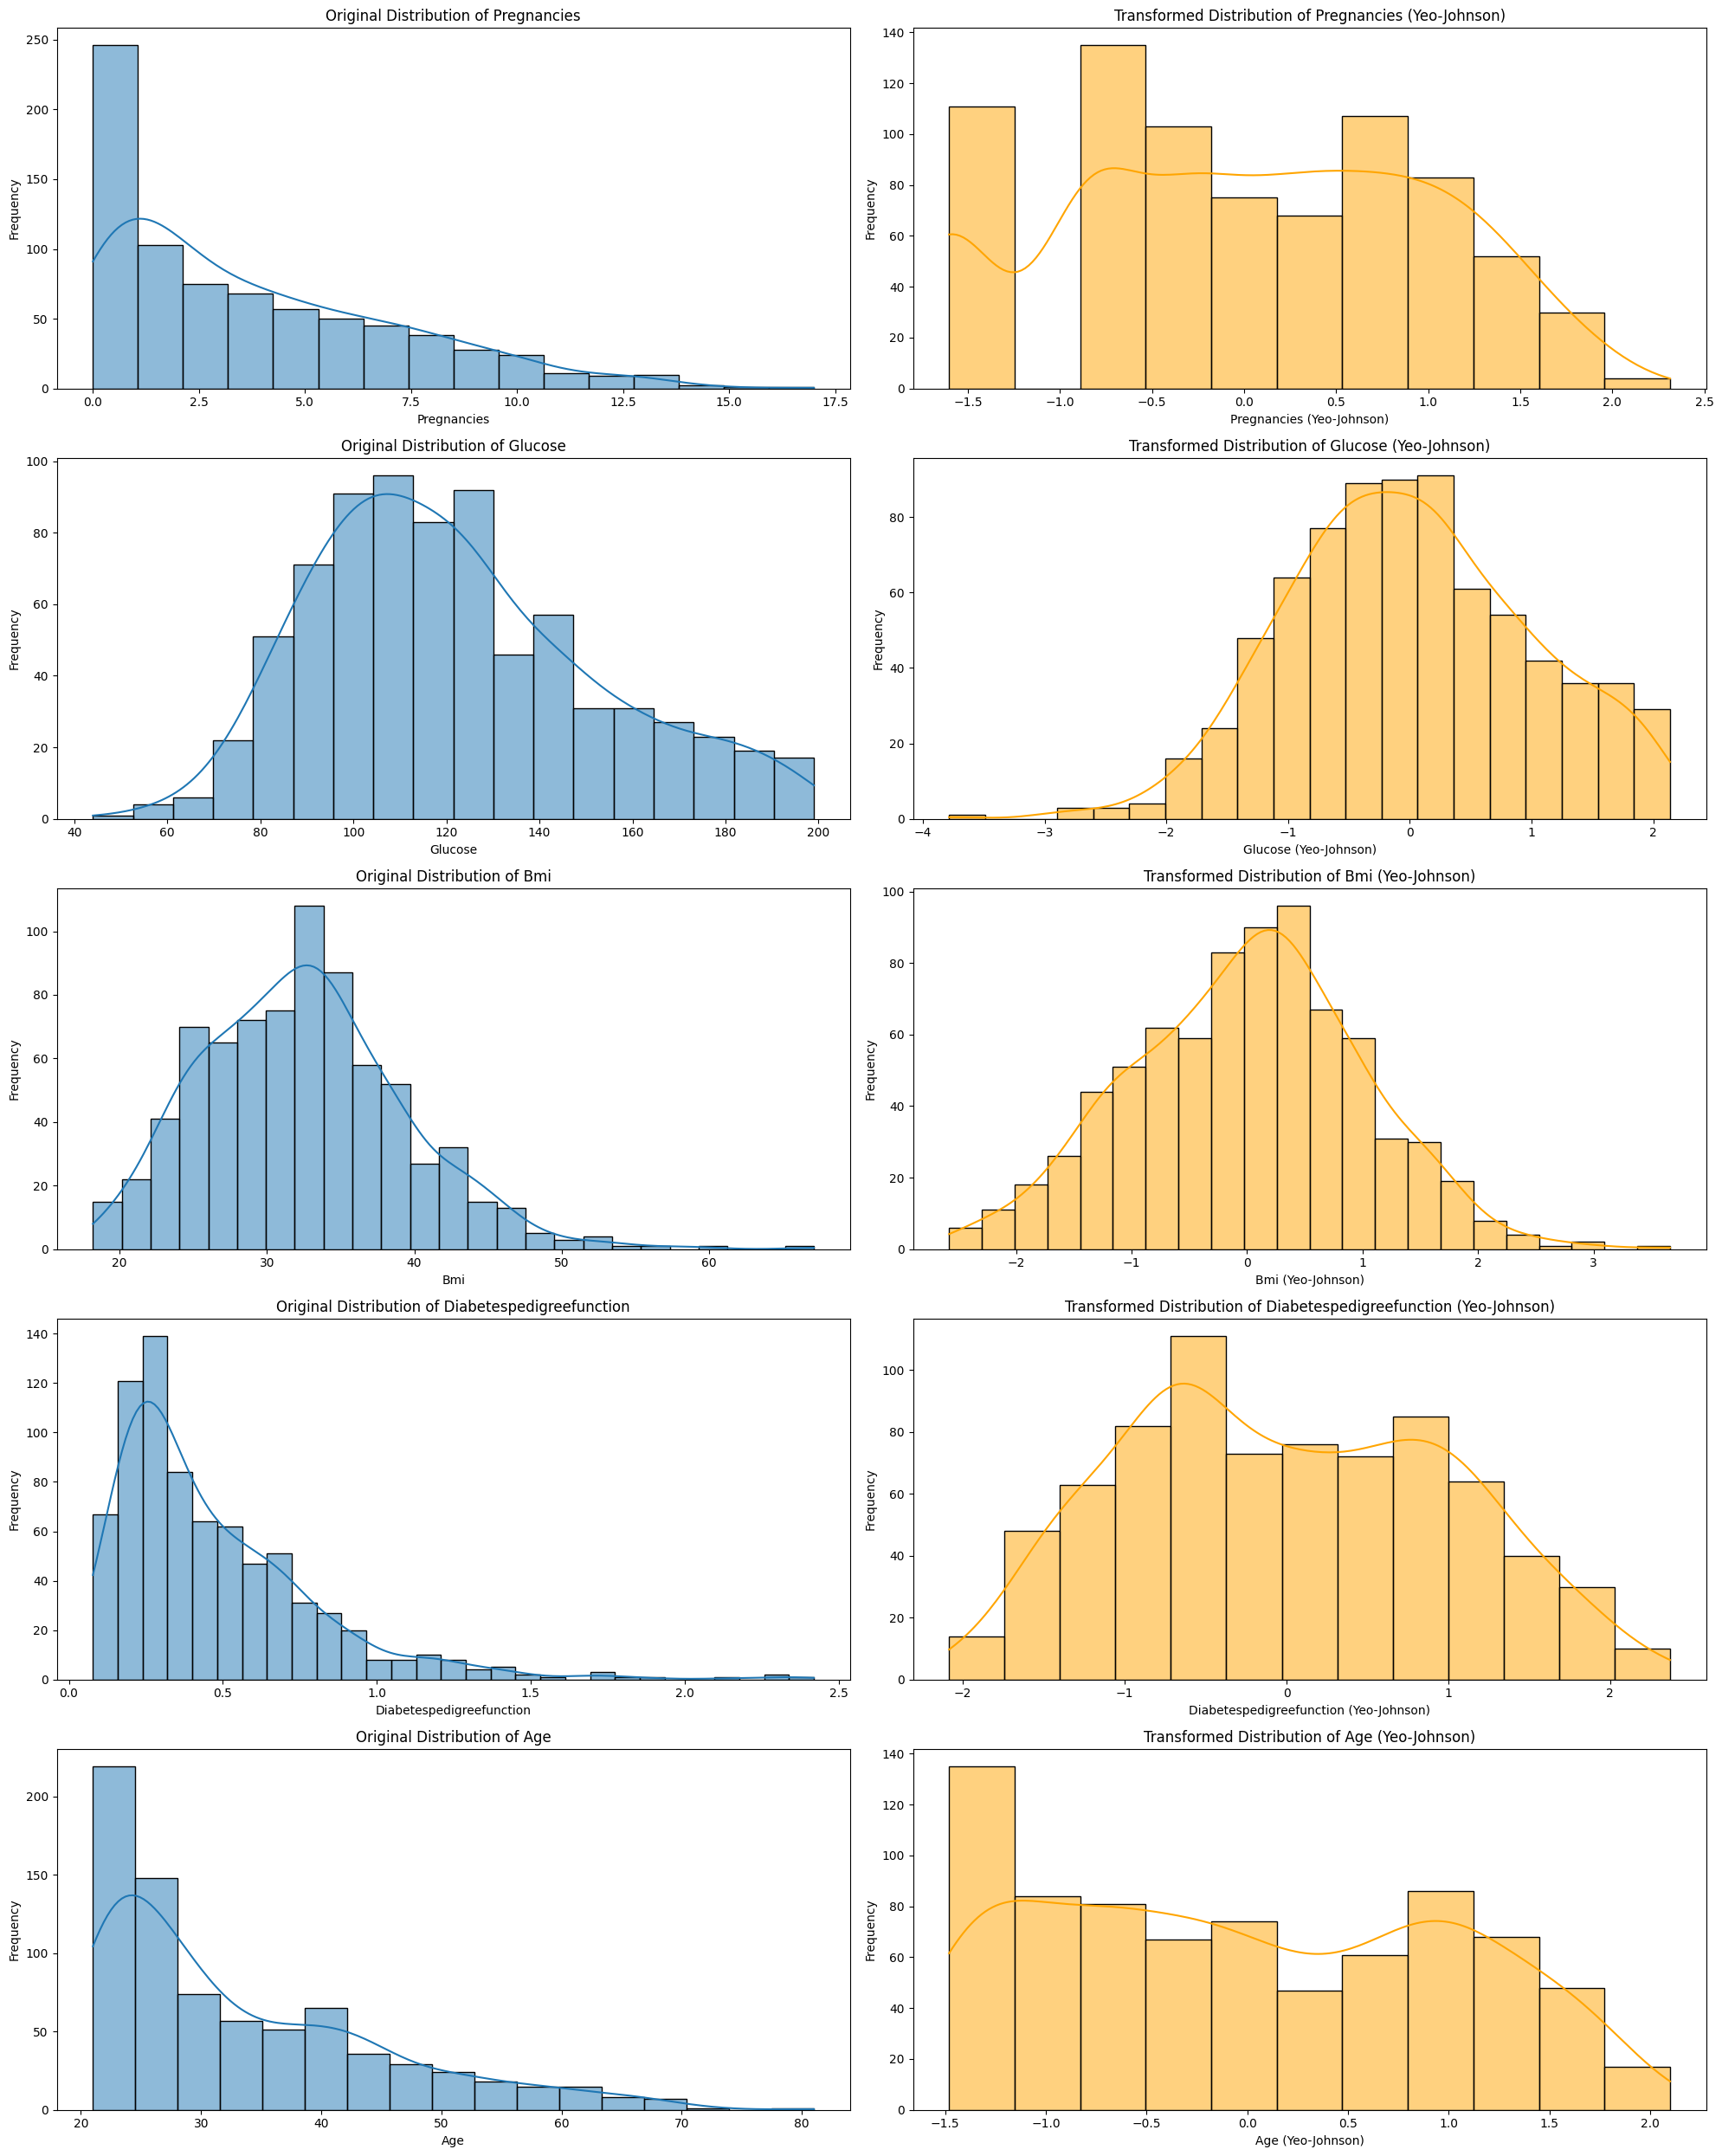

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure size for side-by-side comparison
plt.figure(figsize=(20, 5 * len(highly_skewed_features)))

# Create histograms with KDE for each original and transformed highly skewed column
for i, feature in enumerate(highly_skewed_features):
    # Original feature subplot
    plt.subplot(len(highly_skewed_features), 2, 2 * i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Original Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')

    # Transformed feature subplot
    plt.subplot(len(highly_skewed_features), 2, 2 * i + 2)
    sns.histplot(df_transformed[f'{feature}_yeojohnson'], kde=True, color='orange')
    plt.title(f'Transformed Distribution of {feature.capitalize()} (Yeo-Johnson)')
    plt.xlabel(f'{feature.capitalize()} (Yeo-Johnson)')
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Reasoning**:
To quantitatively compare the effectiveness of the Yeo-Johnson transformation, I will calculate the skewness and kurtosis for both the original highly skewed features and their newly transformed versions.



In [27]:
print("--- Skewness and Kurtosis after Yeo-Johnson Transformation ---")

for feature in highly_skewed_features:
    original_skewness = df[feature].skew()
    transformed_skewness = df_transformed[f'{feature}_yeojohnson'].skew()
    original_kurtosis = df[feature].kurtosis()
    transformed_kurtosis = df_transformed[f'{feature}_yeojohnson'].kurtosis()

    print(f"\nFeature: {feature.capitalize()}")
    print(f"  Original Skewness: {original_skewness:.4f} | Transformed Skewness: {transformed_skewness:.4f}")
    print(f"  Original Kurtosis: {original_kurtosis:.4f} | Transformed Kurtosis: {transformed_kurtosis:.4f}")

--- Skewness and Kurtosis after Yeo-Johnson Transformation ---

Feature: Pregnancies
  Original Skewness: 0.9017 | Transformed Skewness: -0.0446
  Original Kurtosis: 0.1592 | Transformed Kurtosis: -0.9882

Feature: Glucose
  Original Skewness: 0.5356 | Transformed Skewness: -0.0016
  Original Kurtosis: -0.2578 | Transformed Kurtosis: -0.2291

Feature: Bmi
  Original Skewness: 0.5992 | Transformed Skewness: -0.0004
  Original Kurtosis: 0.9202 | Transformed Kurtosis: -0.0695

Feature: Diabetespedigreefunction
  Original Skewness: 1.9199 | Transformed Skewness: 0.1423
  Original Kurtosis: 5.5950 | Transformed Kurtosis: -0.8832

Feature: Age
  Original Skewness: 1.1296 | Transformed Skewness: 0.1502
  Original Kurtosis: 0.6432 | Transformed Kurtosis: -1.2062


# What we have done yet.

### 1. Data loading and inspection

### 2. column renaming to lower case for better readability

### 3. Handling Zeros and flag them for reform.

### 4. Outlier Detection (IQR)

### 5. Outlier Treatment Applied capping

### 6. Feature Distribution Analysis KDE all plots.

### 7. Skewness Correction applied Yeo - Johnson.


# What else remain now.

### Correlation Analysis.
### Feature Scaling
### F. Engg
### Data Splitting
### Model Selection


Calculate the Pearson correlation matrix for all relevant numeric features, including the 'outcome' column, in the `df_transformed` DataFrame to quantitatively assess linear relationships.

In [28]:
import pandas as pd

# Ensure 'outcome' is treated as numeric for correlation calculation if it's not already.
# If 'outcome' is still in df, it should be in df_transformed as well.
# If 'outcome' was not in numeric_cols from before, add it back for this step.
all_numeric_cols = df_transformed.select_dtypes(include=['number']).columns.tolist()
if 'outcome' not in all_numeric_cols:
    # This case should not happen if outcome is present in original df and is numeric
    # but added for robustness. Assuming 'outcome' is an int64 column.
    if 'outcome' in df_transformed.columns and pd.api.types.is_numeric_dtype(df_transformed['outcome']):
        all_numeric_cols.append('outcome')

# Remove any flag columns created earlier as they are not typically used in correlation analysis for main features
# and remove transformed columns for now to focus on original features + outcome for core correlation.
final_cols_for_correlation = [col for col in all_numeric_cols if not (col.startswith('flag_') or col.endswith('_yeojohnson'))]

# Also ensure 'outcome' is in final list
if 'outcome' not in final_cols_for_correlation:
    final_cols_for_correlation.append('outcome')


# Calculate the Pearson correlation matrix
correlation_matrix = df_transformed[final_cols_for_correlation].corr(method='pearson')

print("Pearson Correlation Matrix:")
display(correlation_matrix.round(2))


Pearson Correlation Matrix:


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.00,0.13,0.21,0.11,0.09,0.02,-0.03,0.54,0.22
glucose,0.13,1.00,0.22,0.18,0.41,0.23,0.14,0.27,0.49
bloodpressure,0.21,0.22,1.00,0.20,0.11,0.28,-0.00,0.32,0.17
skinthickness,0.11,0.18,0.20,1.00,0.20,0.56,0.09,0.12,0.22
insulin,0.09,0.41,0.11,0.20,1.00,0.18,0.09,0.17,0.27
bmi,0.02,0.23,0.28,0.56,0.18,1.00,0.15,0.03,0.31
diabetespedigreefunction,-0.03,0.14,-0.00,0.09,0.09,0.15,1.00,0.03,0.17
age,0.54,0.27,0.32,0.12,0.17,0.03,0.03,1.00,0.24
outcome,0.22,0.49,0.17,0.22,0.27,0.31,0.17,0.24,1.00


**Reasoning**:
To visually represent the correlation matrix and easily identify strong relationships between features, I will generate a heatmap using `seaborn.heatmap`.



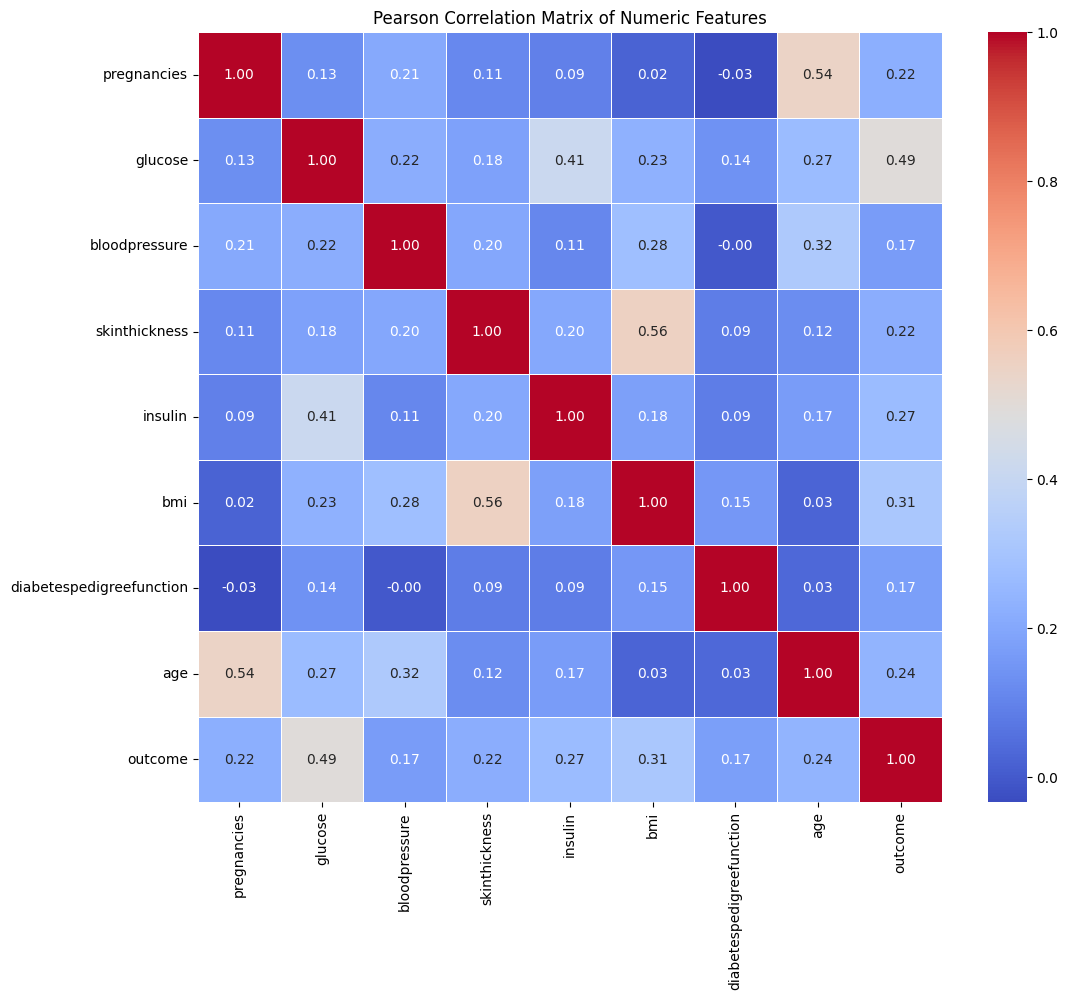

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Numeric Features')
plt.show()


## Generate Pairplots

### Subtask:
Create a pairplot for a subset of key numeric features in `df_transformed`, colored by the 'outcome' variable, to visualize pairwise relationships and distributions across different outcome groups.


**Reasoning**:
To visualize pairwise relationships and distributions, I will generate a pairplot for a subset of key numeric features (already defined in `final_cols_for_correlation` from the previous correlation analysis step) in the `df_transformed` DataFrame, coloring the plots by the 'outcome' variable to highlight differences between the two groups.



<Figure size 1500x1500 with 0 Axes>

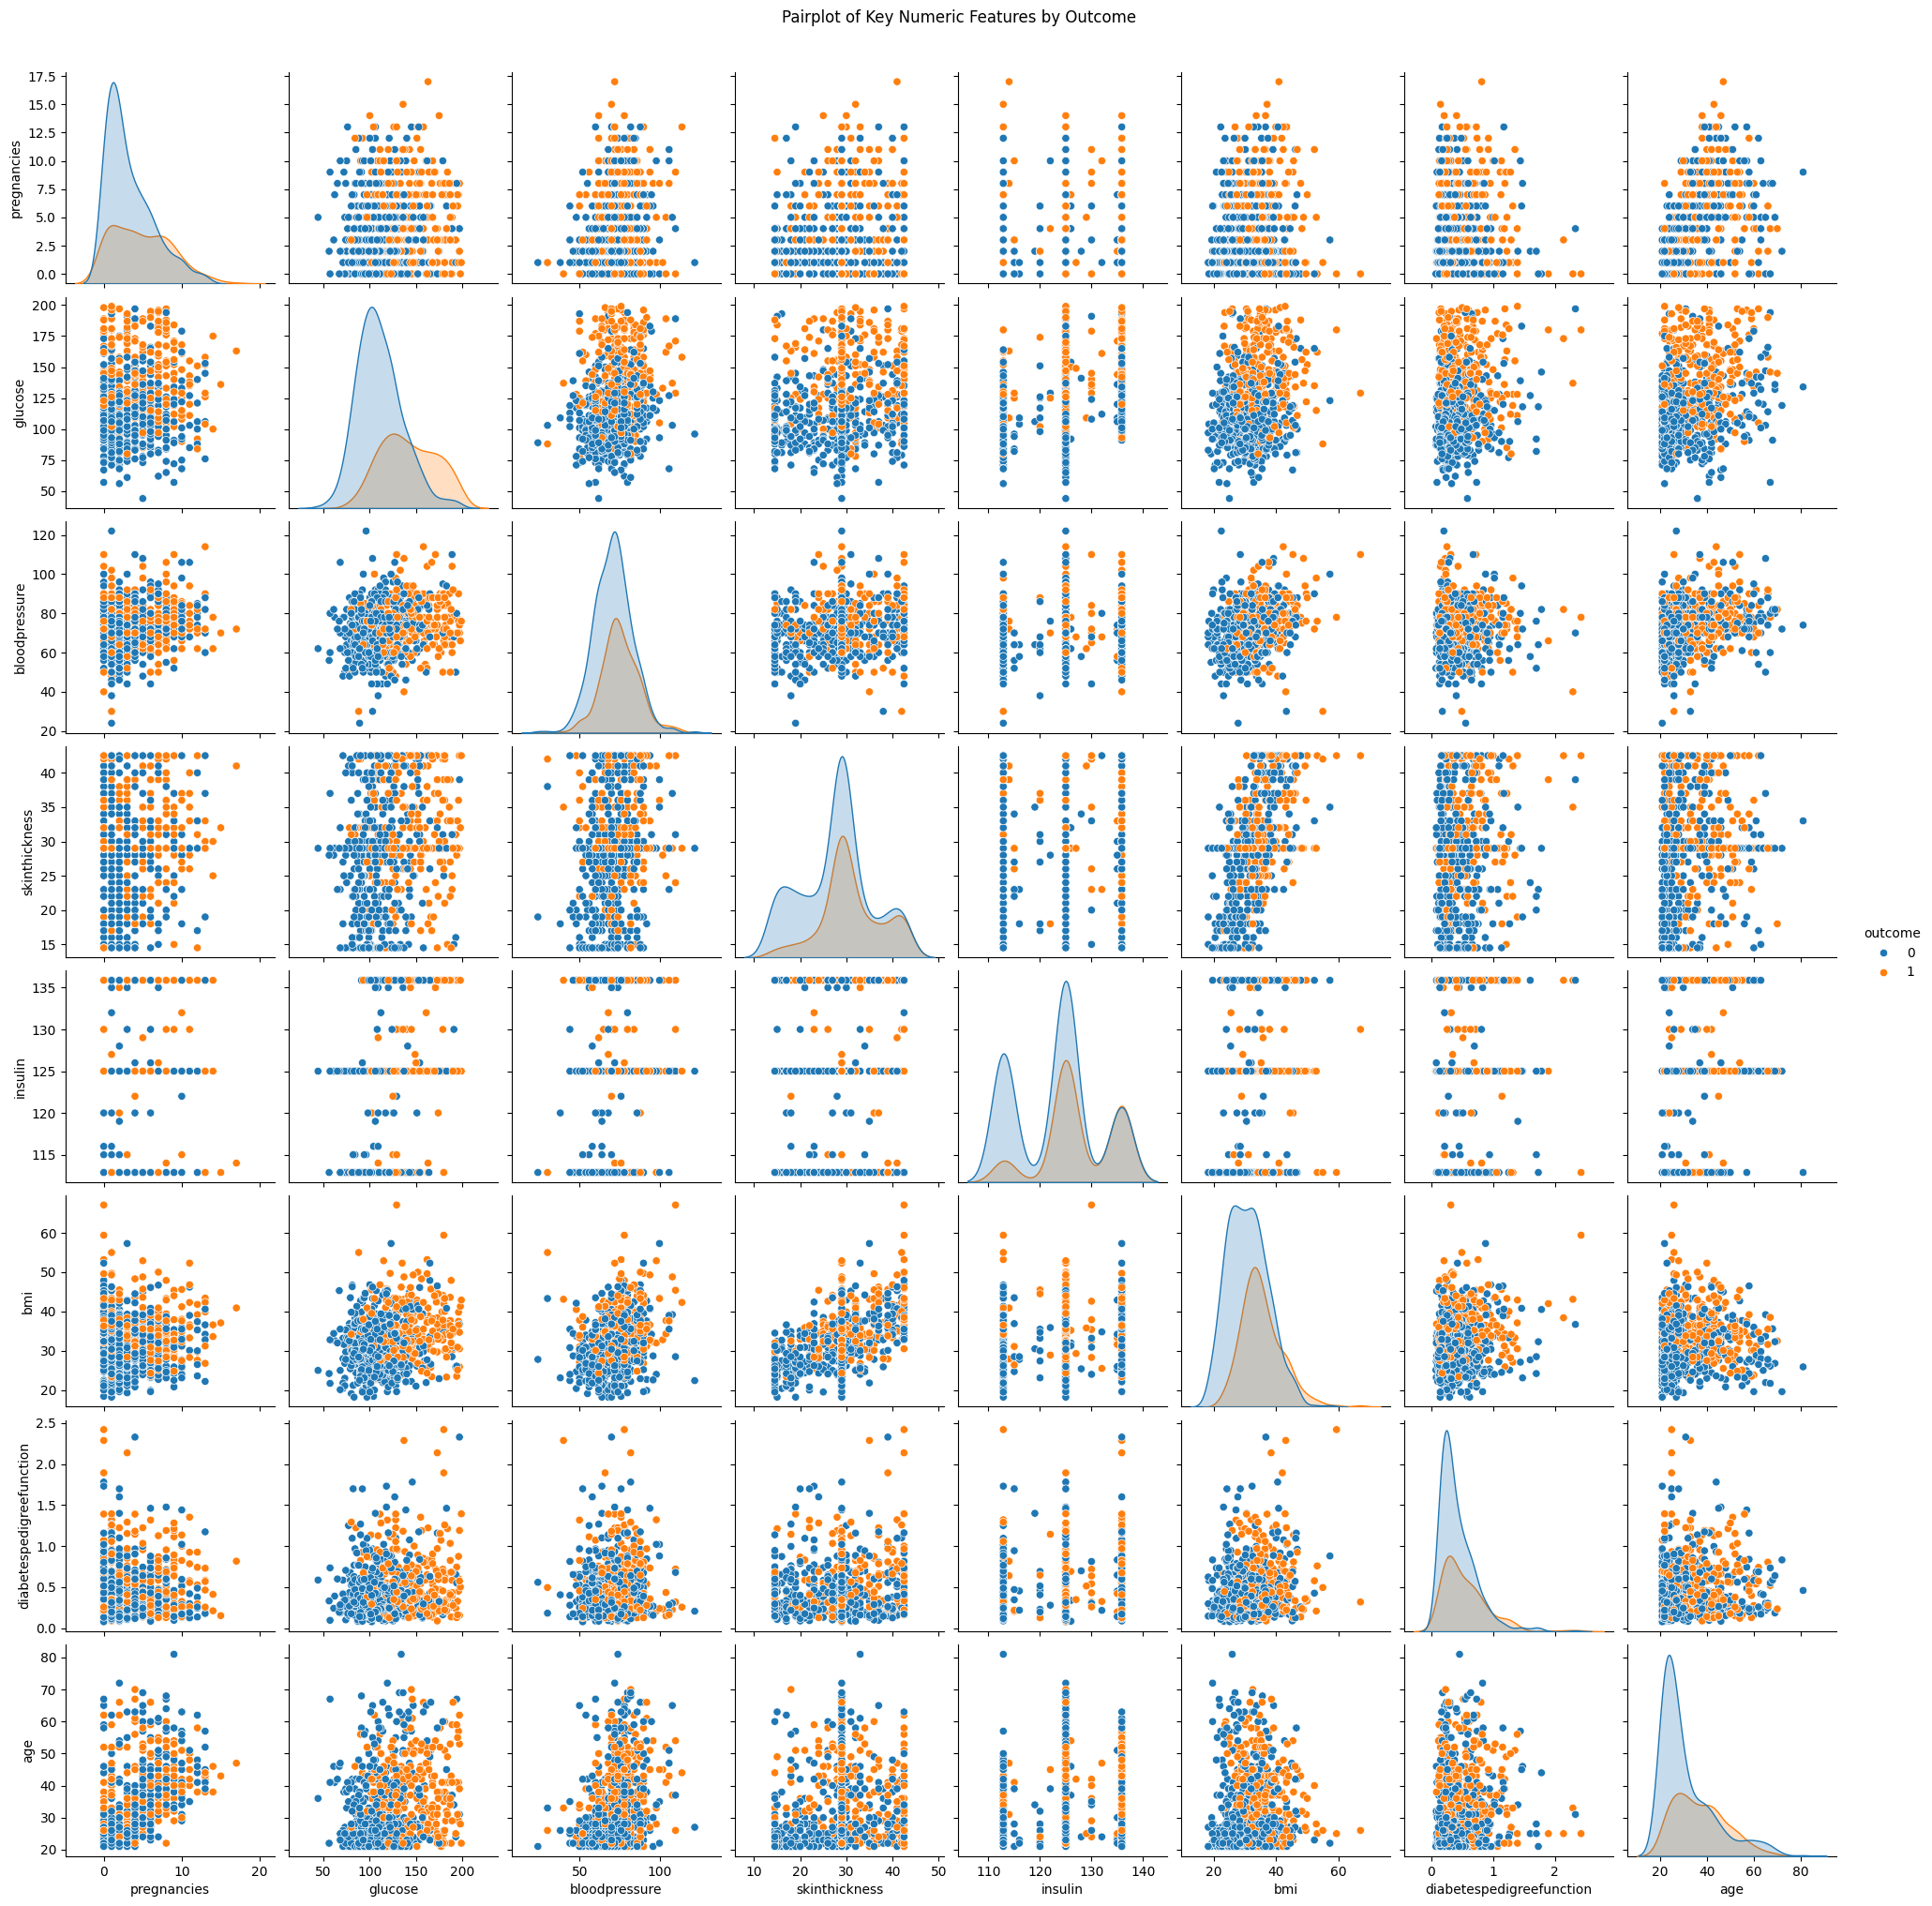

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of key numeric features including 'outcome'
# Using 'final_cols_for_correlation' which contains the cleaned original features + outcome
features_for_pairplot = final_cols_for_correlation

# Create a pairplot
# Set figure size to improve readability given the number of features
plt.figure(figsize=(15, 15))
sns.pairplot(df_transformed[features_for_pairplot], hue='outcome', diag_kind='kde')
plt.suptitle('Pairplot of Key Numeric Features by Outcome', y=1.02) # Adjust suptitle position
plt.show()

## Visualize Key Scatterplots

### Subtask:
Based on the correlation analysis, identify features with strong relationships and generate individual scatterplots to further explore these specific connections, differentiating by 'outcome'.


**Reasoning**:
To fulfill the subtask, I will first identify pairs of features with strong linear relationships based on the previously calculated correlation matrix, particularly focusing on those correlated with 'outcome'. Then, I will generate individual scatterplots for these identified pairs, using 'outcome' to color-code the points, and ensure all plots are clearly labeled.



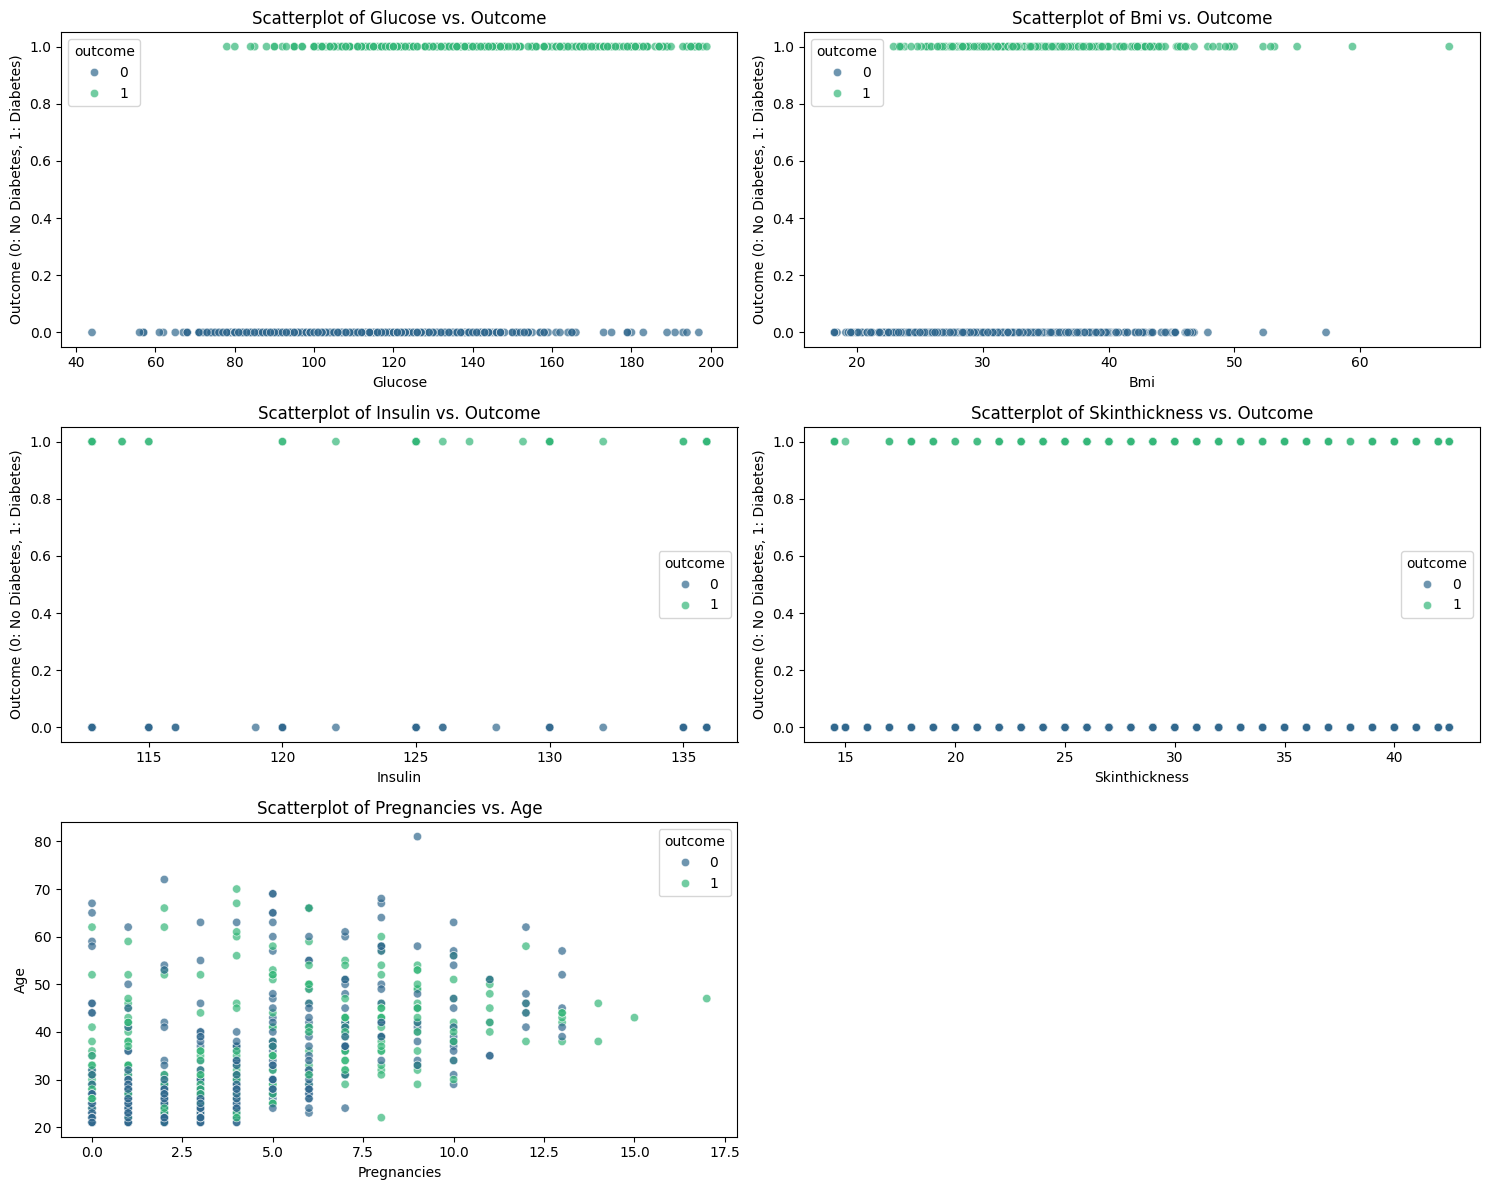

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify features with strong correlations, especially with 'outcome'
# From the correlation matrix, some strong relationships are:
# glucose and outcome (0.49)
# bmi and outcome (0.31)
# insulin and outcome (0.27)
# skinthickness and outcome (0.26)
# pregnancies and age (0.54)

# Define the pairs of features to visualize
feature_pairs_to_plot = [
    ('glucose', 'outcome'),
    ('bmi', 'outcome'),
    ('insulin', 'outcome'),
    ('skinthickness', 'outcome'),
    ('pregnancies', 'age')
]

# Set up the matplotlib figure size
plt.figure(figsize=(15, 12))

for i, (feat1, feat2) in enumerate(feature_pairs_to_plot):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed

    if feat2 == 'outcome': # If plotting against outcome
        sns.scatterplot(data=df_transformed, x=feat1, y=feat2, hue='outcome', palette='viridis', alpha=0.7)
        plt.title(f'Scatterplot of {feat1.capitalize()} vs. Outcome')
        plt.xlabel(feat1.capitalize())
        plt.ylabel('Outcome (0: No Diabetes, 1: Diabetes)')
    else: # For internal feature relationships
        sns.scatterplot(data=df_transformed, x=feat1, y=feat2, hue='outcome', palette='viridis', alpha=0.7)
        plt.title(f'Scatterplot of {feat1.capitalize()} vs. {feat2.capitalize()}')
        plt.xlabel(feat1.capitalize())
        plt.ylabel(feat2.capitalize())

plt.tight_layout()
plt.show()

## Compare Feature Distributions by Outcome

### Subtask:
For several key numeric features, create comparative visualizations (e.g., boxplots or KDE plots) grouped by the 'outcome' variable (0 vs. 1) to highlight differences in distributions between the two groups.


**Reasoning**:
To visually compare feature distributions by outcome, I will select key numeric features and generate boxplots for each, grouped by the 'outcome' variable.



/tmp/ipython-input-1327138393.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformed, x='outcome', y=feature, palette='viridis')
/tmp/ipython-input-1327138393.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformed, x='outcome', y=feature, palette='viridis')
/tmp/ipython-input-1327138393.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformed, x='outcome', y=feature, palette='viridis')
/tmp/ipython-input-1327138393.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

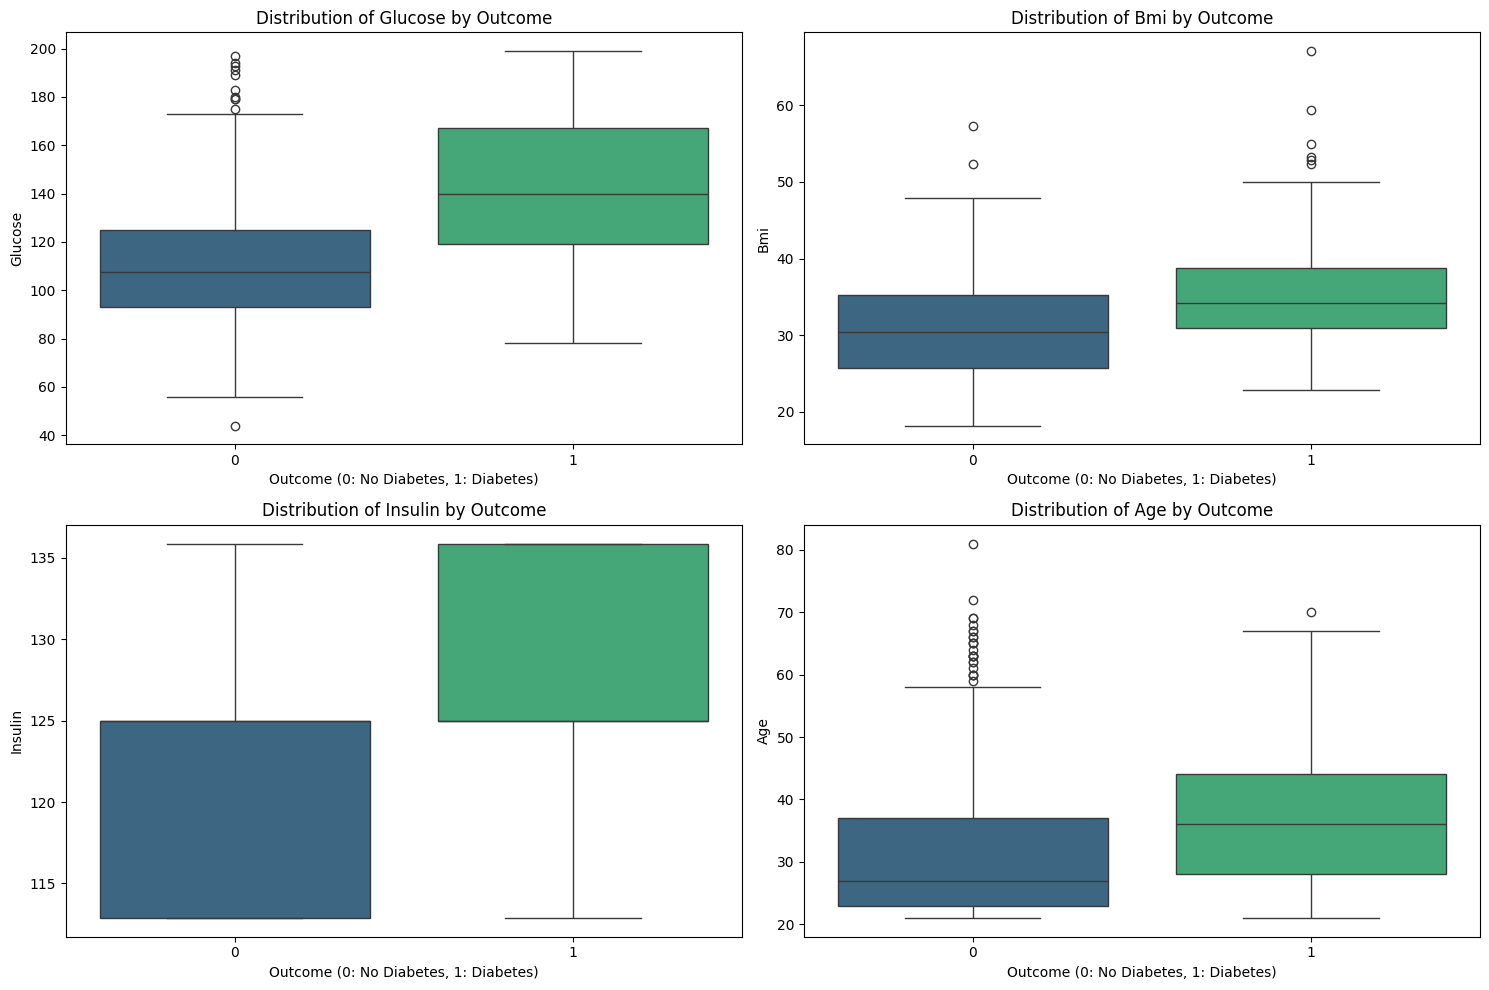

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify 3-4 key numeric features that showed strong correlations with 'outcome'
# Based on previous correlation analysis, 'glucose', 'bmi', 'insulin', and 'age' are good candidates.
key_features_for_comparison = ['glucose', 'bmi', 'insulin', 'age']

# Set up the matplotlib figure size to accommodate multiple plots
plt.figure(figsize=(15, 10))

# Create comparative boxplots for each key feature, grouped by 'outcome'
for i, feature in enumerate(key_features_for_comparison):
    plt.subplot(2, 2, i + 1) # Arrange in a 2x2 grid
    sns.boxplot(data=df_transformed, x='outcome', y=feature, palette='viridis')
    plt.title(f'Distribution of {feature.capitalize()} by Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature.capitalize())

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Reasoning**:
The previous code generated a FutureWarning because `palette` was used without explicitly assigning a `hue` parameter in `seaborn.boxplot`. To resolve this and ensure future compatibility, I will add `hue='outcome'` to the `sns.boxplot` call, which implicitly sets the `palette` based on the `outcome` variable.



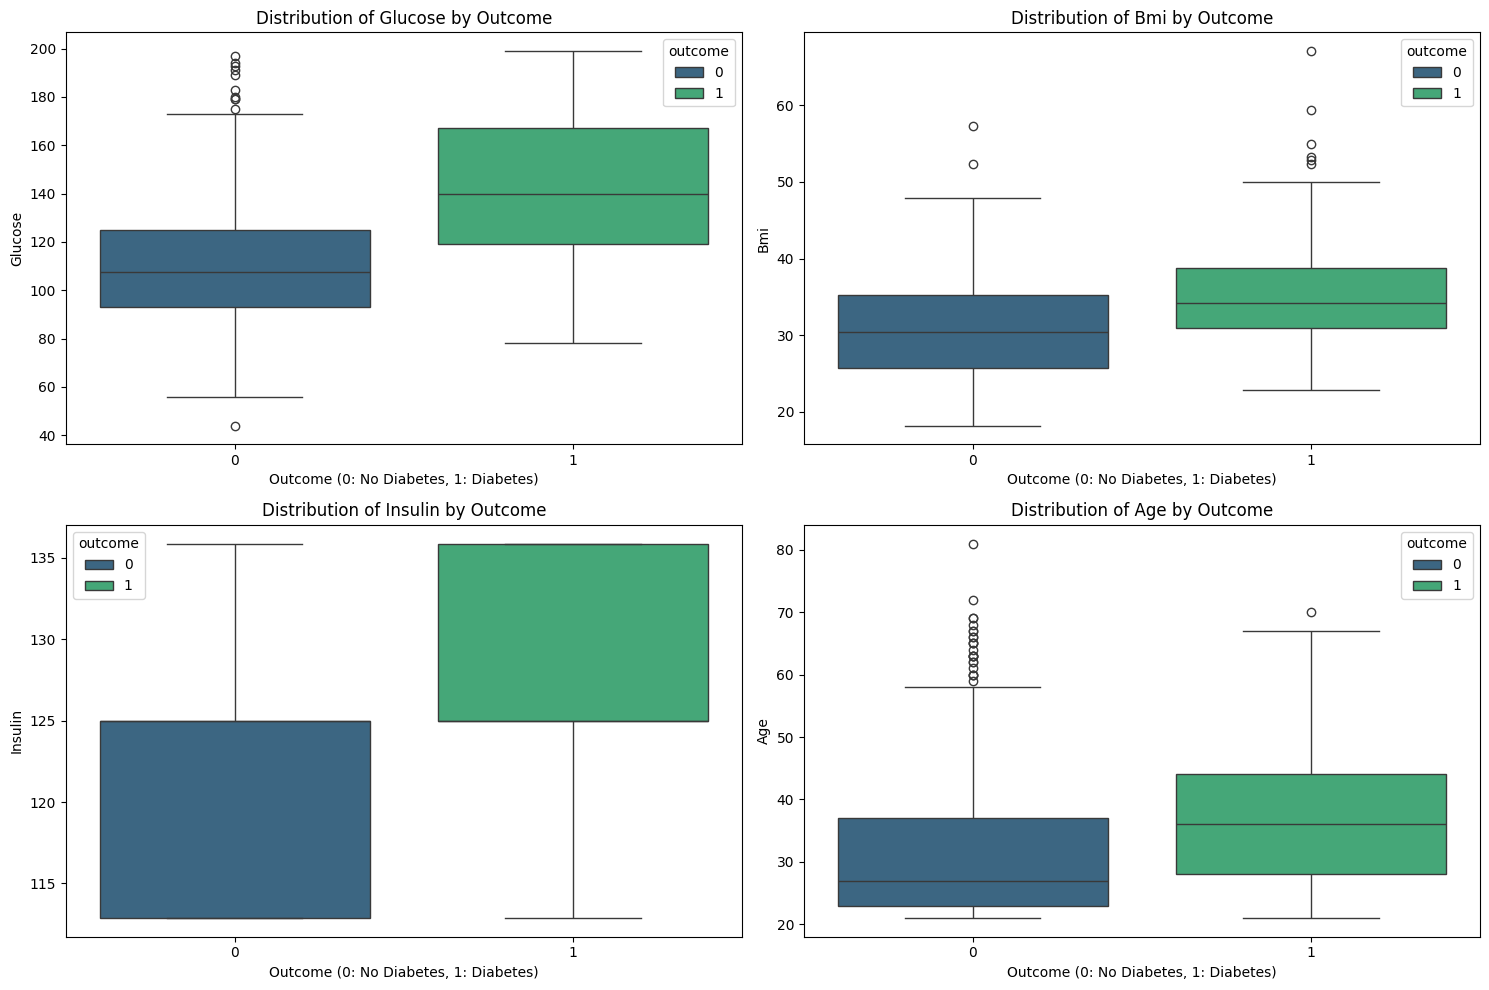

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify 3-4 key numeric features that showed strong correlations with 'outcome'
# Based on previous correlation analysis, 'glucose', 'bmi', 'insulin', and 'age' are good candidates.
key_features_for_comparison = ['glucose', 'bmi', 'insulin', 'age']

# Set up the matplotlib figure size to accommodate multiple plots
plt.figure(figsize=(15, 10))

# Create comparative boxplots for each key feature, grouped by 'outcome'
for i, feature in enumerate(key_features_for_comparison):
    plt.subplot(2, 2, i + 1) # Arrange in a 2x2 grid
    sns.boxplot(data=df_transformed, x='outcome', y=feature, hue='outcome', palette='viridis')
    plt.title(f'Distribution of {feature.capitalize()} by Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature.capitalize())

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Summarize Relationship Analysis

### Subtask:
Provide a comprehensive summary of the relationship analysis, highlighting the most significant correlations, insights from various plots, and notable differences in feature distributions between outcome groups.


In [37]:
# Select the first 9 columns from df_transformed
df_first_9_cols = df_transformed.iloc[:, :9]

print("Displaying the head of the DataFrame with the first 9 columns:")
display(df_first_9_cols.head())

Displaying the head of the DataFrame with the first 9 columns:


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33,1


In [38]:
df_transformed.to_csv('diabetes_cleaned.csv', index=False)
print("DataFrame saved to 'diabetes_cleaned.csv'")

DataFrame saved to 'diabetes_cleaned.csv'
